**Importing necessary dependencies**

In [22]:
!pip install kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [23]:
!kaggle datasets download -d kkairu/nairobi-stocks-exchange-sharesstocks-data

Dataset URL: https://www.kaggle.com/datasets/kkairu/nairobi-stocks-exchange-sharesstocks-data
License(s): unknown
nairobi-stocks-exchange-sharesstocks-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
#extracting csv files from zip file
from zipfile import ZipFile

kaggle_zip = '/content/nairobi-stocks-exchange-sharesstocks-data.zip'

with ZipFile(kaggle_zip, 'r') as zip:
  zip.extractall()

print('Successfully extracted')

Successfully extracted


In [25]:
#Data Loading
data = pd.read_csv('/content/NSE_SCOM_Safaricom.csv')
data.head()

,Date,Open,High,Low,Close,Vol.,Change %
0,11-06-2012,3.40,3.45,3.35,3.40,3.24M,0.00%
1,12-06-2012,3.40,3.50,3.40,3.45,6.09M,1.47%
2,13-06-2012,3.45,3.45,3.35,3.40,7.29M,-1.45%
3,14-06-2012,3.40,3.45,3.35,3.40,31.81M,0.00%
4,15-06-2012,3.40,3.50,3.40,3.40,7.57M,0.00%


**Data Understanding**

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1753 non-null   object 
 1   Open      1753 non-null   float64
 2   High      1753 non-null   float64
 3   Low       1753 non-null   float64
 4   Close     1753 non-null   float64
 5   Vol.      1753 non-null   object 
 6   Change %  1753 non-null   object 
dtypes: float64(4), object(3)
memory usage: 96.0+ KB


In [27]:
print('Dataset Shape : ', data.shape)

Dataset Shape :  (1753, 7)


In [28]:
#Converting Date column from object to datetime
data['Date']  = pd.to_datetime(data['Date'], format = "%d-%m-%Y")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1753 entries, 0 to 1752
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1753 non-null   datetime64[ns]
 1   Open      1753 non-null   float64       
 2   High      1753 non-null   float64       
 3   Low       1753 non-null   float64       
 4   Close     1753 non-null   float64       
 5   Vol.      1753 non-null   object        
 6   Change %  1753 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 96.0+ KB


In [29]:
print('Min Date: ', data['Date'].min())
print('Max Date: ', data['Date'].max())

Min Date:  2012-06-11 00:00:00
Max Date:  2019-06-14 00:00:00


Text(0, 0.5, 'Price')

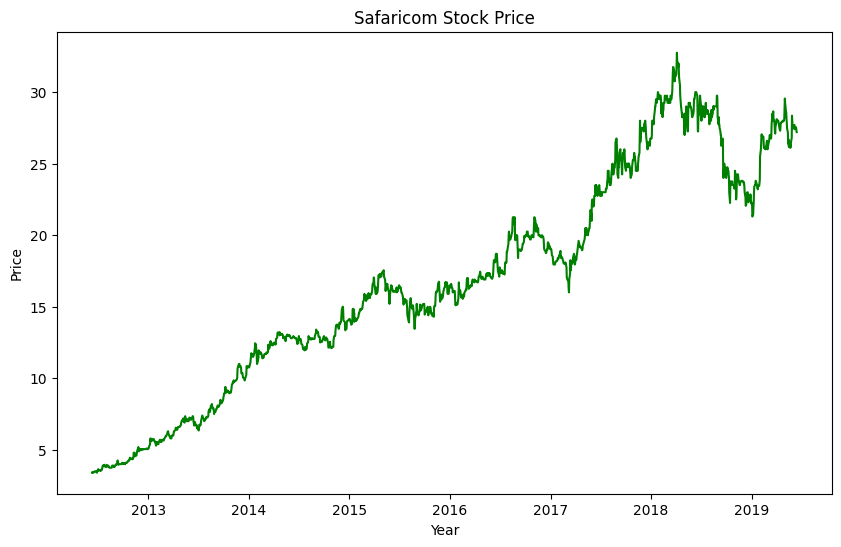

In [30]:
plt.figure(figsize = (10,6))
plt.plot(data['Date'], data['Close'], color = 'green')
plt.title('Safaricom Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')

**Data preparation**

In [31]:
#Defining the relevant features
data = data[['Date', 'Close']]
data.head()

,Date,Close
0,2012-06-11,3.40
1,2012-06-12,3.45
2,2012-06-13,3.40
3,2012-06-14,3.40
4,2012-06-15,3.40


In [32]:
#Scaling close prices
close_prices = data['Close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range = (0,1))
scaled_prices = scaler.fit_transform(close_prices)
scaled_prices

array([[0.        ],
       [0.00170358],
       [0.        ],
       ...,
       [0.82112436],
       [0.81601363],
       [0.8109029 ]])

In [33]:
#Creating sequences for LSTM
def create_sequences(data, n_steps):
  x, y = [], []
  for i in range(len(data) - n_steps):
    x.append(data[i: i + n_steps])
    y.append(data[i + n_steps])

  return np.array(x), np.array(y)

n_steps = 10

x, y = create_sequences(scaled_prices, n_steps)
print(x)

[[[0.        ]
  [0.00170358]
  [0.        ]
  ...
  [0.00340716]
  [0.00340716]
  [0.00340716]]

 [[0.00170358]
  [0.        ]
  [0.        ]
  ...
  [0.00340716]
  [0.00340716]
  [0.00340716]]

 [[0.        ]
  [0.        ]
  [0.        ]
  ...
  [0.00340716]
  [0.00340716]
  [0.00340716]]

 ...

 [[0.85008518]
  [0.83816014]
  [0.82623509]
  ...
  [0.81771721]
  [0.81942078]
  [0.82282794]]

 [[0.83816014]
  [0.82623509]
  [0.81942078]
  ...
  [0.81942078]
  [0.82282794]
  [0.82112436]]

 [[0.82623509]
  [0.81942078]
  [0.82623509]
  ...
  [0.82282794]
  [0.82112436]
  [0.81601363]]]


In [34]:
#splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [35]:
x_train[:10]

array([[[0.        ],
        [0.00170358],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00170358],
        [0.00170358],
        [0.00340716],
        [0.00340716],
        [0.00340716]],

       [[0.00170358],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.00170358],
        [0.00170358],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00340716]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.00170358],
        [0.00170358],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00340716]],

       [[0.        ],
        [0.        ],
        [0.00170358],
        [0.00170358],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00340716],
        [0.00170358]],

       [[0.        ],
        [0.00170358],
        [0.00170358],
        [0.00340716],
        [0.00340716],
  

In [36]:
y_train[:10]

array([[0.00340716],
       [0.00340716],
       [0.00170358],
       [0.        ],
       [0.00170358],
       [0.00681431],
       [0.00851789],
       [0.00511073],
       [0.00511073],
       [0.00545145]])

In [37]:
#LSTMs expect input in the shape (samples, time steps, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

**Modeling**

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(LSTM(units = 100, return_sequences = True, input_shape = (n_steps, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

model.compile(optimizer=Adam(learning_rate=0.0003), loss = 'mean_squared_error')

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 10, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,301 (473.83 KB)

 Trainable params: 121,301 (473.83 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
#Defining early stopping callback to prevent overfitting and to reduce training time if possible
early_stopping = [
    EarlyStopping(monitor="val_loss", patience=10, verbose=1),
    ModelCheckpoint(filepath="mymodel.h5.keras", monitor="val_loss",
                    save_best_only=True, save_weights_only=False, verbose=1)
]

history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=early_stopping,
                    verbose=1,
                    shuffle=False)


Epoch 1/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0235
Epoch 1: val_loss improved from inf to 0.02138, saving model to mymodel.h5.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 125ms/step - loss: 0.0251 - val_loss: 0.0214
Epoch 2/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0127
Epoch 2: val_loss improved from 0.02138 to 0.00860, saving model to mymodel.h5.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0123 - val_loss: 0.0086
Epoch 3/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.0044
Epoch 3: val_loss improved from 0.00860 to 0.00379, saving model to mymodel.h5.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0043 - val_loss: 0.0038
Epoch 4/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0037
Epoch 4: val_loss improved from 0.00379 to 0.00243, saving model to mymodel.h5.keras
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 5/50
17/18 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0013
Epoch 5: val_loss improved from 0.00

**Model Evaluation**

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


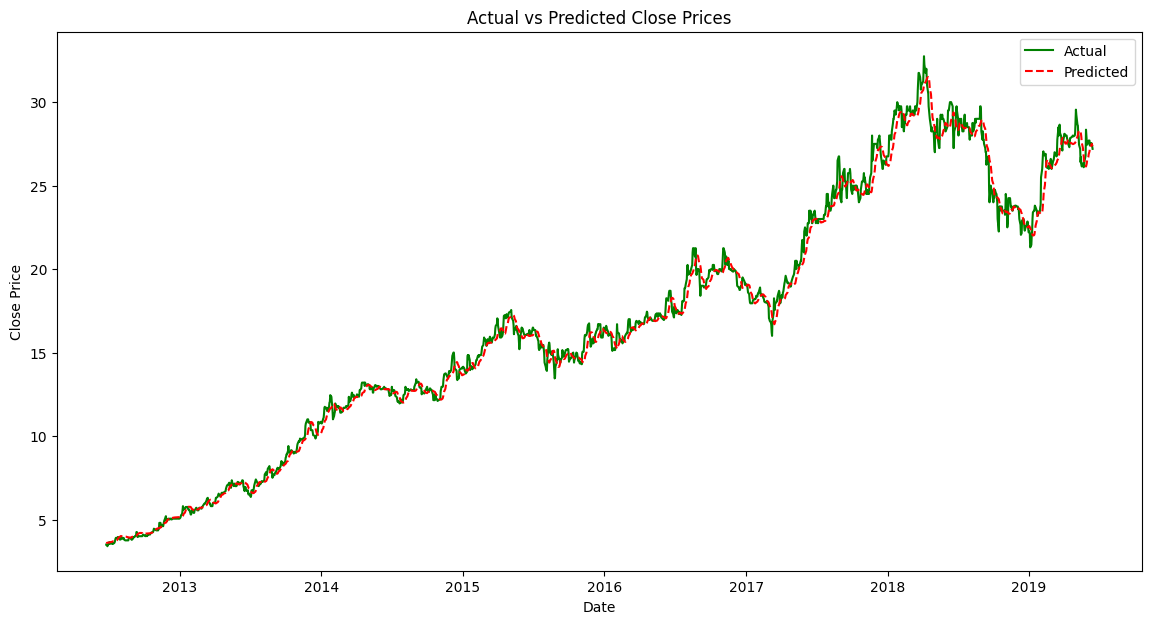

In [40]:
# Predictions for the entire dataset
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Inverse transform predictions and actual values to original scale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)

y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Combining the predictions and actual values
all_pred = np.concatenate([y_train_pred, y_test_pred], axis=0)
all_actual = np.concatenate([y_train_inv, y_test_inv], axis=0)

# Plotting the entire range
plt.figure(figsize=(14, 7))
plt.plot(data.Date[-len(all_actual):], all_actual, color='green', label='Actual')
plt.plot(data.Date[-len(all_pred):], all_pred, color='red', linestyle='--', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices')
plt.legend()
plt.show()


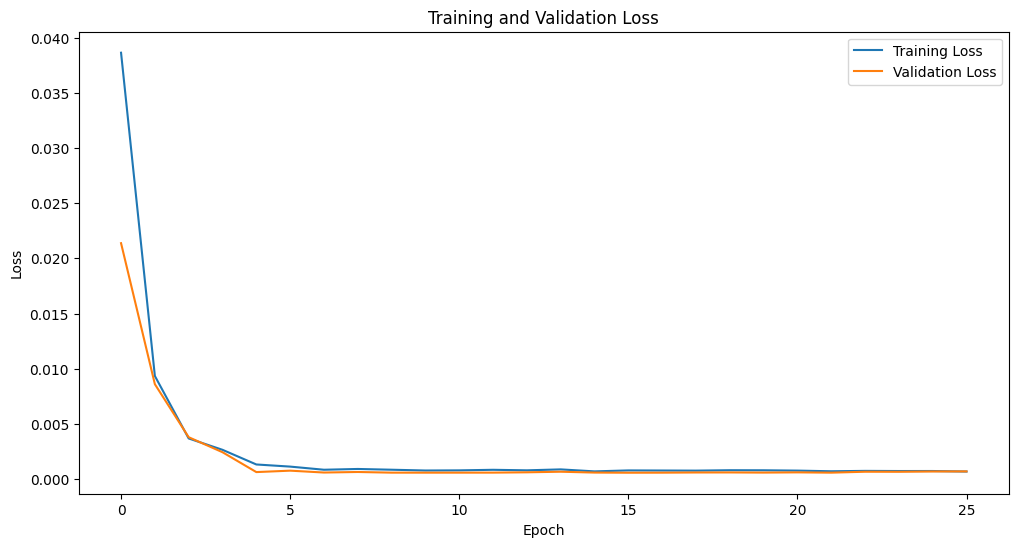

In [41]:
# Extracting loss and validation loss from history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [42]:
# Calculating metrics for the training set
mse_train = mean_squared_error(y_train_inv, y_train_pred)
mae_train = mean_absolute_error(y_train_inv, y_train_pred)
rmse_train = np.sqrt(mse_train)

# Calculating metrics for the test set
mse_test = mean_squared_error(y_test_inv, y_test_pred)
mae_test = mean_absolute_error(y_test_inv, y_test_pred)
rmse_test = np.sqrt(mse_test)

# Printing the results
print("Training Set Metrics:")
print(f'MSE: {mse_train}')
print(f'MAE: {mse_train}')
print(f'RMSE: {mse_train}\n')

print("TestSet Metrics:")
print(f'MSE: {mse_test}')
print(f'MAE: {mae_test}')
print(f'RMSE: {rmse_test}')


Training Set Metrics:
MSE: 0.27263426663245316
MAE: 0.27263426663245316
RMSE: 0.27263426663245316

TestSet Metrics:
MSE: 0.8225780240761146
MAE: 0.6897779306231392
RMSE: 0.9069608724063649
